### Import implementation classes

In [2]:
from SchedulingProblem import ProjectSchedulingModel
from ArtificialBeeColony import ArtificialBeeColony, Parameters, InitParams

### Load problems instances

In [23]:
from Utils import loadProblems, loadBestKnown
PATHS = ["j30.sm/j30", "j60.sm/j60", "j90.sm/j90", "j120.sm/j120"]
print("Loading problems and best known solutions...")
# Load problem sets
problems_data = {path.split(".")[0]: loadProblems(path) for path in PATHS}
# Load best known solutions
best_known_data = {f"j{i}": loadBestKnown(i) for i in [30, 60, 90, 120]}

# Assign best_known solutions to problem instances
for key in problems_data.keys():
    if key in best_known_data:
        current_problems = problems_data[key]
        current_best_known = best_known_data[key]
        for i, best_val in enumerate(current_best_known):
            if i < len(current_problems):
                current_problems[i].best_known = best_val
            else:
                # This case should ideally not happen if data is consistent
                print(f"Warning: More best_known values than problems for {key}. Index {i} is out of bounds for problems list (length {len(current_problems)}).")
    else:
        print(f"Warning: No best_known data found for problem key {key}.")

Loading problems and best known solutions...


### Instantiate ABC optimizer

In [7]:
n = 121
problem = problems_data["j30"][n]
abc = ArtificialBeeColony(psmodel=problem)
init_params = InitParams(heuristics_rate=1, sampling_rate=0)
params = Parameters(N=4, limit=125, max_evaluations=50000, init_params=init_params)

### Solve

In [8]:
best_solution = abc.optimize(params=params, mode="abc")
history = abc.history
population_diversity = abc.population_divsersity
nscout_bees = abc.nscout_bees
nunique_individuals = abc.nunique_individuals

### Show results

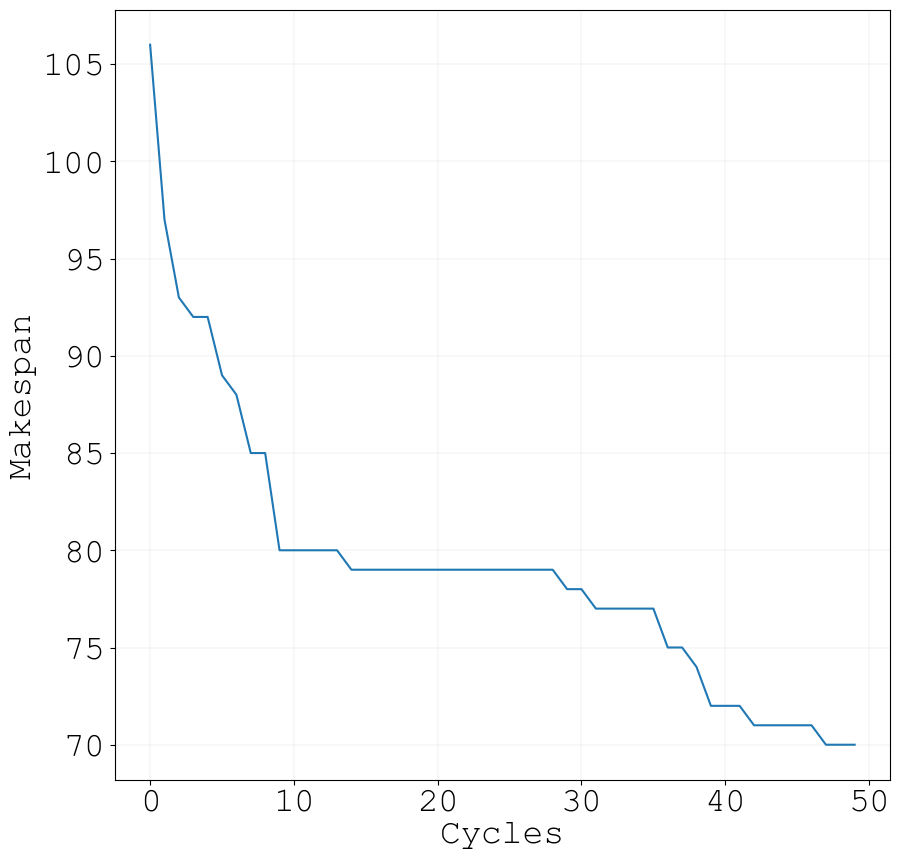

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot([s.get_makespan() for s in history[:50]], label='best solution')
# plt.plot([problem.best_known] * len(history), linestyle='--', label='optimal solution')

plt.xlabel('Cycles')
plt.ylabel('Makespan')
# plt.title('Convergence')
plt.grid(True, which='both', linestyle='-', linewidth=0.25, alpha=0.5)
# plt.legend()
plt.savefig("../Assets/convergence.pdf")
plt.show()

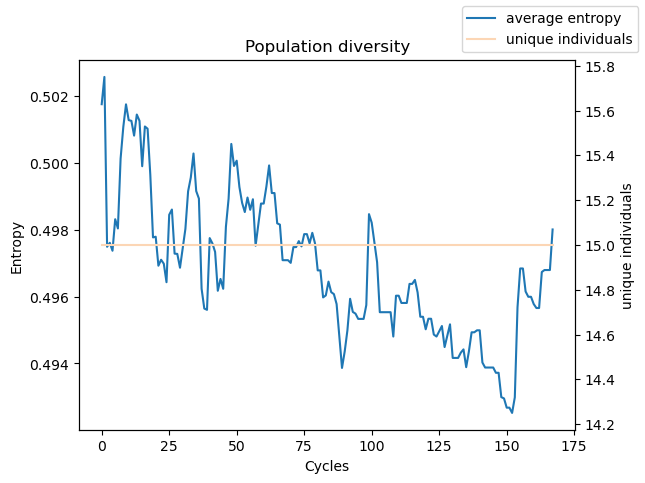

In [49]:
# Sample data
x = [i for i in range(len(population_diversity))]
y1 = population_diversity      # First dataset
y2 = nunique_individuals
# Create a figure and axis
fig, ax1 = plt.subplots()

color1 = '#1f77b4'  # blue from Tableau palette
color2 = "#fcd6b5"  # orange from Tableau palette

# Plot the first dataset
ax1.plot(x, y1, label='average entropy', color=color1)
ax1.set_xlabel('Cycles')
ax1.set_ylabel('Entropy')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(x, y2, color=color2, label='unique individuals')
ax2.set_ylabel('unique individuals')
ax2.tick_params(axis='y')

fig.legend()
# Show the plot
plt.title("Population diversity")
plt.show()


In [10]:
print(best_solution)

Event 0 at time 0, jobs: 1, 3, 4
Event 1 at time 2, jobs: 2, 6
Event 2 at time 4, jobs: 12
Event 3 at time 5, jobs: 7, 11
Event 4 at time 6, jobs: 5
Event 5 at time 8, jobs: 15
Event 6 at time 13, jobs: 18, 14
Event 7 at time 17, jobs: 21
Event 8 at time 18, jobs: 8, 31
Event 9 at time 21, jobs: 24
Event 10 at time 25, jobs: 19
Event 11 at time 27, jobs: 9, 17, 27
Event 12 at time 28, jobs: 10
Event 13 at time 35, jobs: 23
Event 14 at time 36, jobs: 13
Event 15 at time 40, jobs: 16, 28
Event 16 at time 46, jobs: 20
Event 17 at time 47, jobs: 22, 25
Event 18 at time 50, jobs: 29, 26
Event 19 at time 51, jobs: 30
Event 20 at time 59, jobs: 32



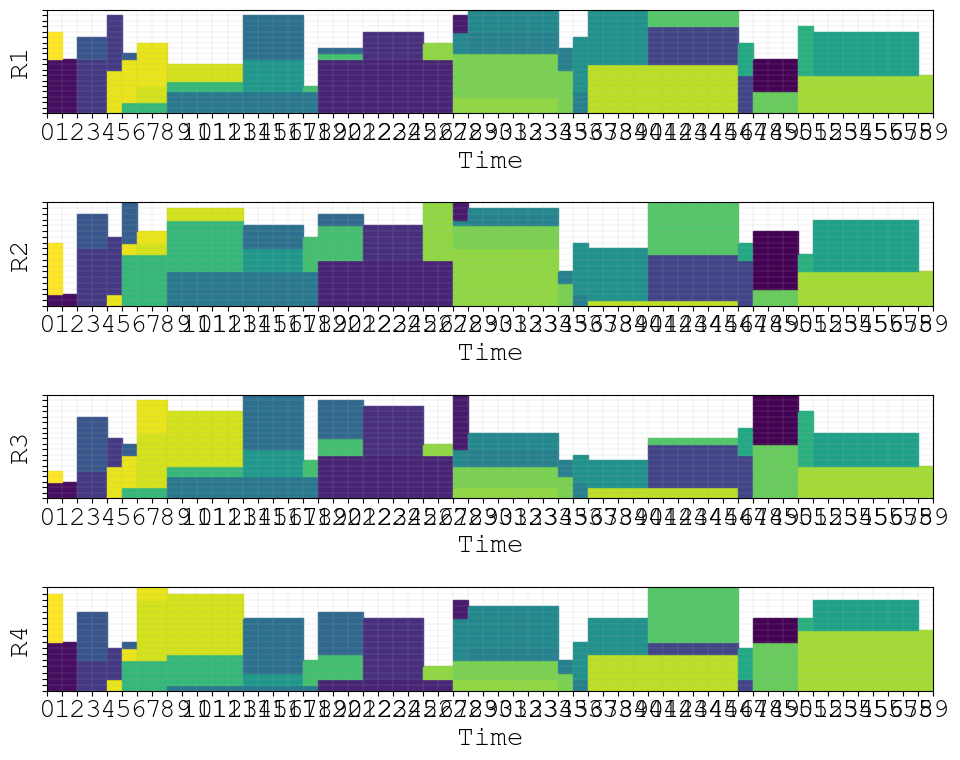

In [11]:
best_solution.plot()

In [10]:
# solutions = []
# for p in problems:
#     abc = ArtificialBeeColony(psmodel=p)
#     h = abc.optimize(params=params)
#     solutions.append(h)


In [11]:
# diff = []
# for i, sol in enumerate(solutions):
#     diff.append(sol.get_makespan() - optimal[i])

In [12]:
# print('ARPD:', sum(diff)*100/len(diff))
# print('optimal found in', len(list(filter(lambda x: x == 0, diff))), 'out of', len(diff))

In [22]:
import numpy as np
from Utils import positional_entropy
abc = ArtificialBeeColony(psmodel=problem)

In [20]:
heuristic_rates = np.arange(0, 1, 0.025)
sampling_rates = np.arange(1, 500, 10)

N = 100
diversities1 = []
for rate in heuristic_rates:
    population = abc.init_population(N, init_params=InitParams(heuristics_rate=rate, sampling_rate=15))
    p = [[job.id for job in p.jobs] for p in population]
    diversities1.append(positional_entropy(p)[1])
    
diversities2 = []
for sampling in sampling_rates:
    population = abc.init_population(N, init_params=InitParams(heuristics_rate=1, sampling_rate=sampling))
    p = [[job.id for job in p.jobs] for p in population]
    diversities2.append(positional_entropy(p)[1]) 
    

In [56]:
import matplotlib.pyplot as plt

FONT_SIZE = 15
    
plt.rcParams.update({
    'font.family': 'Courier New',
    'font.size': FONT_SIZE,
    'axes.titlesize': FONT_SIZE,
    'axes.labelsize': FONT_SIZE,
    'xtick.labelsize': FONT_SIZE,
    'ytick.labelsize': FONT_SIZE,
    'figure.titlesize': FONT_SIZE
})

data = diversities1
plt.figure(figsize=(10, 6))
plt.plot(heuristic_rates, data)
plt.xlabel('Proporción de heurísticas')
plt.ylabel('Entropía normalizada')
plt.grid(True)
plt.savefig("../Assets/ph.pdf")
plt.show()

data = diversities2
plt.figure(figsize=(10, 6))
plt.plot(sampling_rates, data)
plt.xlabel('Número de pasos entre muestras')
plt.ylabel('Entropía normalizada')
plt.grid(True)
plt.savefig("../Assets/nt.pdf")
plt.show()

NameError: name 'diversities1' is not defined

In [8]:
population = abc.init_population(N=16, init_params=InitParams(heuristics_rate=1, sampling_rate=0))
permutations = [[job.id for job in p.jobs] for p in population]
print(permutations)

[[0, 3, 9, 13, 4, 10, 2, 7, 15, 17, 34, 16, 26, 56, 1, 14, 46, 12, 28, 5, 20, 22, 44, 71, 8, 67, 42, 29, 11, 51, 55, 23, 19, 82, 27, 33, 99, 102, 36, 73, 54, 24, 86, 18, 79, 30, 35, 40, 41, 80, 87, 50, 43, 76, 74, 58, 65, 64, 47, 48, 6, 38, 100, 101, 59, 83, 21, 45, 57, 62, 61, 49, 70, 31, 103, 39, 66, 72, 77, 93, 89, 90, 107, 25, 53, 68, 63, 91, 92, 32, 37, 84, 85, 95, 110, 52, 97, 98, 105, 60, 109, 78, 114, 75, 81, 88, 94, 106, 116, 69, 104, 117, 96, 111, 112, 115, 120, 119, 108, 113, 118, 121], [0, 3, 9, 13, 4, 10, 2, 7, 15, 17, 34, 16, 26, 56, 1, 14, 46, 12, 28, 5, 20, 22, 44, 71, 8, 67, 42, 29, 11, 51, 55, 23, 19, 82, 27, 33, 99, 102, 36, 73, 54, 24, 86, 18, 79, 30, 35, 40, 41, 80, 87, 50, 43, 76, 74, 58, 65, 64, 47, 48, 6, 38, 100, 101, 59, 83, 21, 45, 57, 62, 61, 49, 70, 31, 103, 39, 66, 72, 77, 93, 89, 90, 107, 25, 53, 68, 63, 91, 92, 32, 37, 84, 85, 95, 110, 52, 97, 98, 105, 60, 109, 78, 114, 75, 81, 88, 94, 106, 116, 69, 104, 117, 96, 111, 112, 115, 120, 119, 108, 113, 118, 1

In [72]:
import scikit_posthocs as sp
from Utils import topological_sort
from EventList import EventList
from scipy.stats import friedmanchisquare
import seaborn as sns
import pandas as pd
from autorank import autorank, create_report, plot_stats


In [46]:
metrics = ["ldf", "sdf", "mrf", "lrf", "random"]
datasets = ["j30", "j60", "j120"] 

results = {metric: {dt: [] for dt in datasets} for metric in metrics}
for metric in metrics:
    for dataset in datasets:
        for problem in problems_data[dataset]:
            heuristic = EventList(psmodel=problem, jobs=topological_sort(problem.jobs, metric=metric))
            results[metric][dataset].append(heuristic.get_makespan())


In [47]:
for metric in metrics:
    makespans = np.array(results[metric]["j120"])
    print(f"metric: {metric}")
    print("mean", np.average(makespans))
    print("std", np.std(makespans))
    print("-------------------")

metric: ldf
mean 342.8833333333333
std 41.25008754199465
-------------------
metric: sdf
mean 395.20416666666665
std 34.171198632360294
-------------------
metric: mrf
mean 372.72083333333336
std 37.3769813205787
-------------------
metric: lrf
mean 378.7604166666667
std 38.93657898634294
-------------------
metric: random
mean 252.48958333333334
std 47.460859925062344
-------------------


        meanrank  median   mad ci_lower ci_upper effect_size   magnitude  \
sdf     4.067708  -104.0  10.0     -108     -101         0.0  negligible   
lrf     3.560417  -100.0  11.0     -104      -97   -0.256658       small   
mrf     3.336458   -98.0  10.0     -102      -95   -0.404694       small   
ldf     2.316667   -90.0  10.0      -94      -87   -0.944287       large   
random  1.718750   -86.0  10.0      -89      -83   -1.214083       large   

       effect_size_above magnitude_above  
sdf                  0.0      negligible  
lrf            -0.256658           small  
mrf            -0.128329      negligible  
ldf            -0.539593          medium  
random         -0.269796           small  
The statistical analysis was conducted for 5 populations with 480 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations sdf (p=0.000), lrf (p=0.000), mrf (p=0.000), ldf (p=0.000

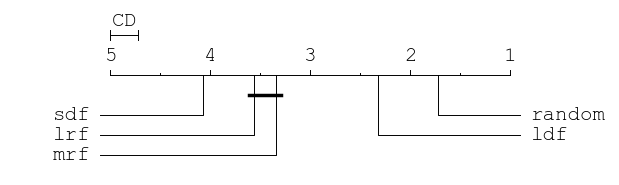

        meanrank  median   mad ci_lower ci_upper effect_size   magnitude  \
sdf     4.364583  -198.0  14.0     -202     -194         0.0  negligible   
lrf     3.628125  -187.0  16.0     -192     -182   -0.493531       small   
mrf     3.569792  -186.0  15.0     -191     -181   -0.557868      medium   
ldf     2.310417  -168.0  15.0     -174     -163   -1.394669       large   
random  1.127083  -142.0  15.0     -147     -137   -2.603382       large   

       effect_size_above magnitude_above  
sdf                  0.0      negligible  
lrf            -0.493531           small  
mrf            -0.043493      negligible  
ldf            -0.809389           large  
random         -1.169117           large  
The statistical analysis was conducted for 5 populations with 480 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations sdf (p=0.000), lrf (p=0.000), mrf (p=0.000), ldf (p=0.000

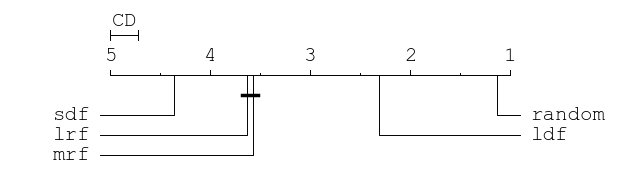

        meanrank  median   mad ci_lower ci_upper effect_size   magnitude  \
sdf     4.463542  -392.0  23.0     -398     -385         0.0  negligible   
lrf     3.748958  -373.0  24.0     -381     -365    -0.54521      medium   
mrf     3.496875  -368.0  23.0     -374     -362   -0.703816      medium   
ldf     2.288542  -336.5  25.0     -345     -329   -1.558408       large   
random  1.002083  -241.5  26.5     -251     -234   -4.091235       large   

       effect_size_above magnitude_above  
sdf                  0.0      negligible  
lrf             -0.54521          medium  
mrf            -0.143476      negligible  
ldf            -0.884502           large  
random         -2.487358           large  
The statistical analysis was conducted for 5 populations with 480 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations sdf (p=0.000), lrf (p=0.000), mrf (p=0.000), ldf (p=0.000

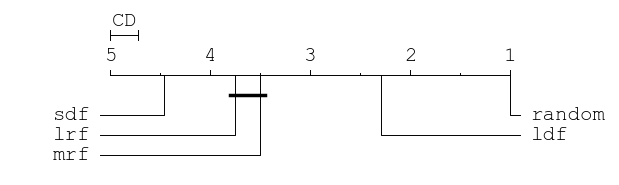

In [77]:

for dt in datasets:
    # Get performance scores per model
    model_scores = [results[metric][dt] for metric in metrics]  # list of lists

    # Transpose: shape becomes (n_problems, n_models)
    data = -np.array(model_scores).T
    
    # Example data: rows = problem instances, columns = models
    df = pd.DataFrame(data, columns=metrics)  # `data` must be shape (n_problems, n_models)

    # Perform statistical ranking
    result = autorank(df, alpha=0.05, verbose=False)

    # Report + Plot
    print(create_report(result))
    plot_stats(result)
    plt.savefig(f"../Assets/cd-{dt}.pdf")
    plt.show()

    # # Friedman test
    # stat, p = friedmanchisquare(*data.T)  # Each column is a model
    # print(f"\nDataset: {dt} — Friedman statistic: {stat:.4f}, p-value: {p:.4f}")

    # if p < 0.05:
    #     # Nemenyi post-hoc test
    #     nemenyi = sp.posthoc_nemenyi_friedman(data)
    #     nemenyi.columns = metrics
    #     nemenyi.index = metrics
    #     print("Nemenyi post-hoc p-value matrix:")
    #     print(nemenyi.round(4))
    # else:
    #     print("No significant difference found, skipping Nemenyi test.")

    # sns.heatmap(nemenyi, annot=True, fmt=".3f", cmap="coolwarm", xticklabels=metrics, yticklabels=metrics)
    # plt.tight_layout()
    # plt.show()

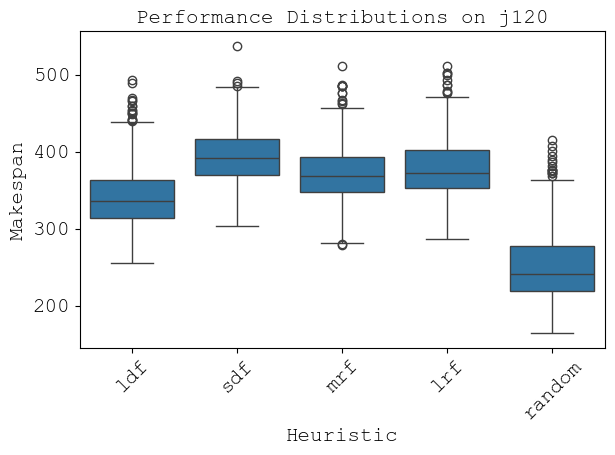

In [ ]:

# Flatten data into a long-form DataFrame
df = pd.DataFrame({metric: results[metric][dt] for metric in metrics})
df_melted = df.melt(var_name="Heuristic", value_name="Makespan")

sns.boxplot(data=df_melted, x="Heuristic", y="Makespan")
plt.title(f"Performance Distributions on {dt}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()